# n_genes across dataset
- method: 

In [1]:
import scanpy as sc

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['pdf.fonttype'] = 42 # set the fonttype of all pdf to 42
plt.rcParams['ps.fonttype'] = 42   # set the PostScript plots 

# # show figures in the notebook
%matplotlib inline 

sc.settings.set_figure_params(dpi=200) # save umaps as non-vectorial hi-res images
# plt.rcParams['figure.figsize']=(10,10) # make figures square if not using the setting bellow
sc.set_figure_params(frameon=False)

In [2]:
adata = sc.read_h5ad("data/TabulaSapiens.h5ad")
adata

AnnData object with n_obs × n_vars = 483152 × 58870
    obs: 'organ_tissue', 'method', 'donor', 'anatomical_information', 'n_counts_UMIs', 'n_genes', 'cell_ontology_class', 'free_annotation', 'manually_annotated', 'compartment', 'gender'
    var: 'gene_symbol', 'feature_type', 'ensemblid', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: '_scvi', '_training_mode', 'compartment_colors', 'dendrogram_cell_type_tissue', 'dendrogram_computational_compartment_assignment', 'dendrogram_consensus_prediction', 'dendrogram_tissue_cell_type', 'donor_colors', 'donor_method_colors', 'hvg', 'method_colors', 'neighbors', 'organ_tissue_colors', 'sex_colors', 'tissue_colors', 'umap'
    obsm: 'X_pca', 'X_scvi', 'X_scvi_umap', 'X_umap'
    layers: 'decontXcounts', 'raw_counts'
    obsp: 'connectivities', 'distances'

In [3]:
# make a copy of adata.obs
metadata = adata.obs.copy()
metadata

,organ_tissue,method,donor,anatomical_information,n_counts_UMIs,n_genes,cell_ontology_class,free_annotation,manually_annotated,compartment,gender
AAACCCACACTCCTGT_TSP6_Liver_NA_10X_1_1,Liver,10X,TSP6,nan,7633.0,2259,macrophage,Monocyte/Macrophage,True,immune,male
AAACGAAGTACCAGAG_TSP6_Liver_NA_10X_1_1,Liver,10X,TSP6,nan,2858.0,1152,monocyte,Monocyte,True,immune,male
AAACGCTCAACGGCTC_TSP6_Liver_NA_10X_1_1,Liver,10X,TSP6,nan,7787.0,2983,endothelial cell of hepatic sinusoid,Endothelial,True,endothelial,male
AAAGAACAGCCTCTTC_TSP6_Liver_NA_10X_1_1,Liver,10X,TSP6,nan,10395.0,2598,macrophage,Monocyte/Macrophage,True,immune,male
AAAGAACGTAGCACAG_TSP6_Liver_NA_10X_1_1,Liver,10X,TSP6,nan,6610.0,2125,liver dendritic cell,Dendritic cell,True,immune,male
...,...,...,...,...,...,...,...,...,...,...,...
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endothelial_P4_S364,Vasculature,smartseq2,TSP2,aorta,13205.0,579,endothelial cell,endothelial cell,True,endothelial,female
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endothelial_P5_S365,Vasculature,smartseq2,TSP2,aorta,9565.0,529,endothelial cell,endothelial cell,True,endothelial,female
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endothelial_P7_S367,Vasculature,smartseq2,TSP2,aorta,195639.0,2753,endothelial cell,endothelial cell,True,endothelial,female
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endothelial_P8_S368,Vasculature,smartseq2,TSP2,aorta,37260.0,984,endothelial cell,endothelial cell,True,endothelial,female


In [4]:
metadata.columns

Index(['organ_tissue', 'method', 'donor', 'anatomical_information',
       'n_counts_UMIs', 'n_genes', 'cell_ontology_class', 'free_annotation',
       'manually_annotated', 'compartment', 'gender'],
      dtype='object')

In [5]:
dict = set(metadata['organ_tissue'])
dict

{'Bladder',
 'Blood',
 'Bone_Marrow',
 'Eye',
 'Fat',
 'Heart',
 'Kidney',
 'Large_Intestine',
 'Liver',
 'Lung',
 'Lymph_Node',
 'Mammary',
 'Muscle',
 'Pancreas',
 'Prostate',
 'Salivary_Gland',
 'Skin',
 'Small_Intestine',
 'Spleen',
 'Thymus',
 'Tongue',
 'Trachea',
 'Uterus',
 'Vasculature'}

In [6]:
set(metadata['method'])

{'10X', 'smartseq2'}

- w/o donor color

In [7]:
color = adata.uns['donor_colors']
color

array(['#f5fbc4', '#eaf7b1', '#d6efb3', '#bde5b5', '#97d6b9', '#73c8bd',
       '#52bcc2', '#37acc3', '#2498c1', '#1f80b8', '#2165ab', '#234da0',
       '#253795', '#172978', '#081d58'], dtype=object)

/Users/yinglin/opt/anaconda3/envs/sc1/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


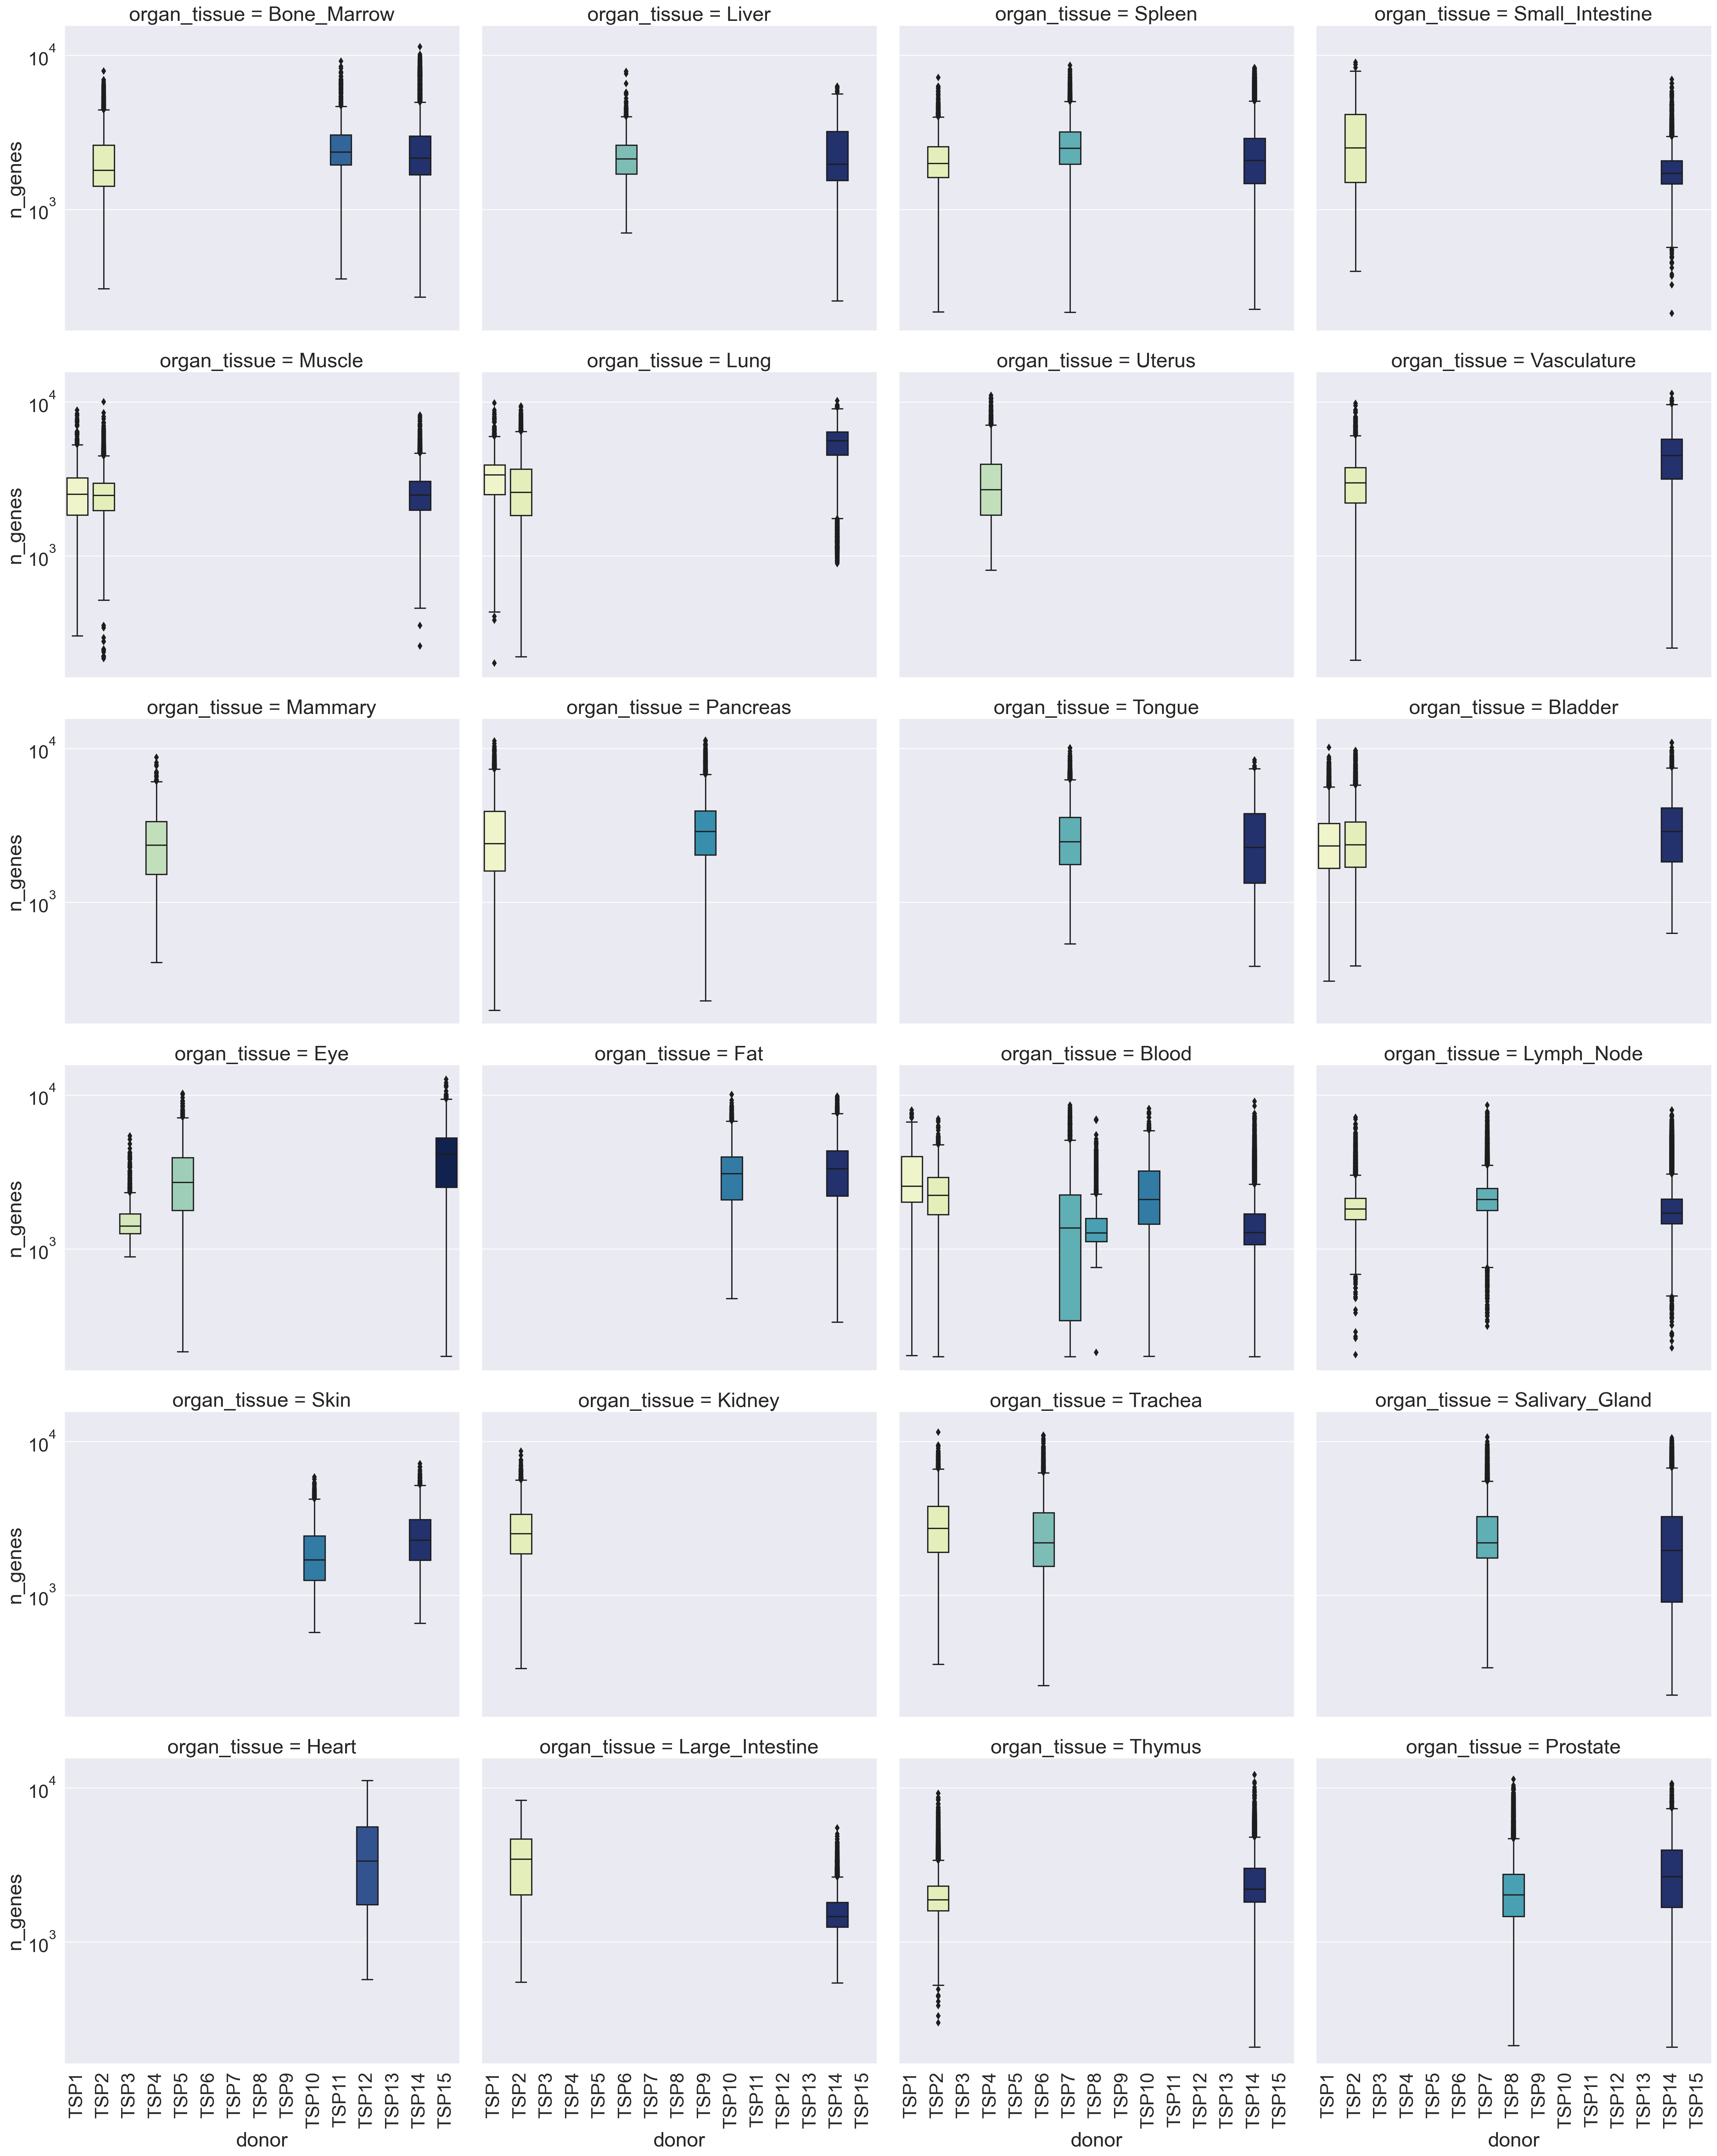

In [8]:
sns.set(font_scale=2) 

g = sns.FacetGrid(
    metadata[metadata['method']=='10X'], 
    col="organ_tissue", col_wrap=4, height=6, aspect=1.2, 
    col_order=dict)

g.map(sns.boxplot, "donor", "n_genes", palette=color).set(yscale = 'log')

for ax in g.axes.ravel():
    if len( ax.get_xticklabels() ) > 0:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.savefig("figures/10X_ngenes.pdf")